<a href="https://colab.research.google.com/github/TajbeerAhamed/Digital_Image_Processing_Lab/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ID: 2125051007

Tajbeer Ahamed Rimon

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

In [ ]:
# Fetch and load image from URL
url = "https://images.unsplash.com/photo-1602866846830-cdd275073c0c?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Nnx8YmxhY2slMjBhbmQlMjB3aGl0ZSUyMHBob3RvZ3JhcGh5fGVufDB8fDB8fHww"  # Replace with your image URL
response = requests.get(url)
image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE)

In [ ]:
# Define the filter kernel and normalize it
kernel = np.array([[1, 1, 1],
                   [1, 2, 1],
                   [1, 1, 1]], dtype=np.float32)
kernel /= kernel.sum()

In [ ]:
# Manual convolution function
def apply_manual_filter(img, k):
    pad_img = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    filtered = np.zeros_like(img, dtype=np.float32)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            region = pad_img[x:x + 3, y:y + 3]
            filtered[x, y] = np.sum(region * k)
    return np.clip(filtered, 0, 255).astype(np.uint8)


In [ ]:
# Apply filters
manual_filtered = apply_manual_filter(image, kernel)
cv2_filtered = cv2.filter2D(image, -1, kernel)


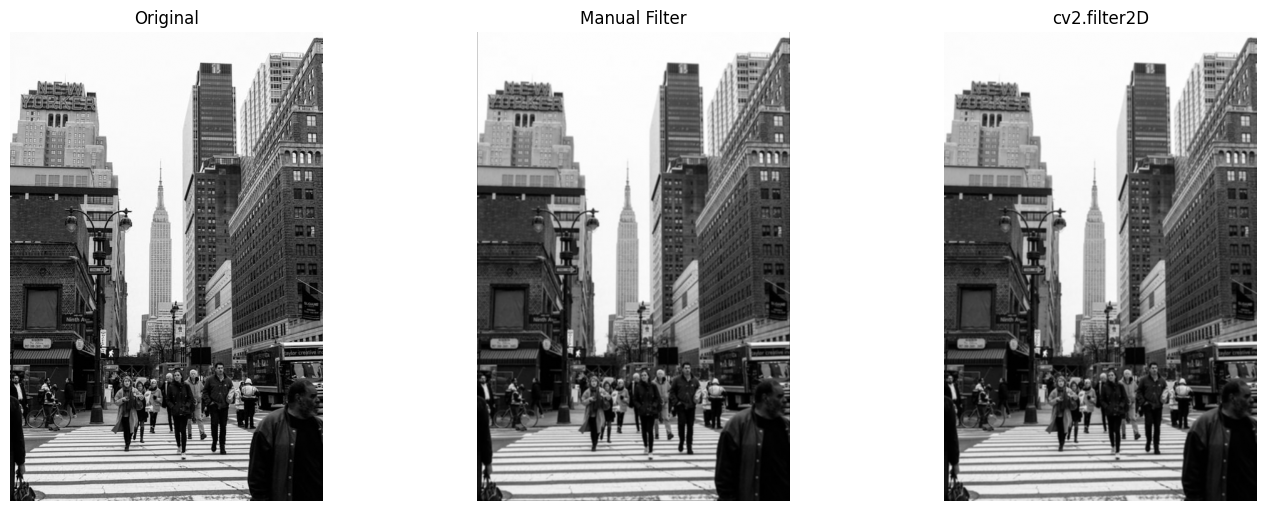

In [ ]:
# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(14, 5), constrained_layout=True)
titles = ['Original', 'Manual Filter', 'cv2.filter2D']
images = [image, manual_filtered, cv2_filtered]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()
